In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Loads the aligned trajectory
import MDAnalysis as mda
ref = mda.Universe('protein.pdb')
sim = mda.Universe('protein.pdb', '0/1ubq_aligned_protein.dcd')

In [3]:
# Perform PCA, which will be used to obtain distances
import MDAnalysis.analysis.pca as pca
sim_pca = pca.PCA(sim, select='protein and name CA')
sim_pca.run(start=40)

# Project simulation onto principal components
sim_projection = sim_pca.transform(sim.select_atoms('protein and name CA'))

# Compute distance between top 20 PCs
ndims = 20
stride = 10
distances = np.array([[np.sqrt(np.sum(np.square(sim_projection[j, :ndims] - sim_projection[k, :ndims]))) \
              for j in range(0, sim_projection.shape[0], stride)] \
                for k in range(0, sim_projection.shape[0], stride)])

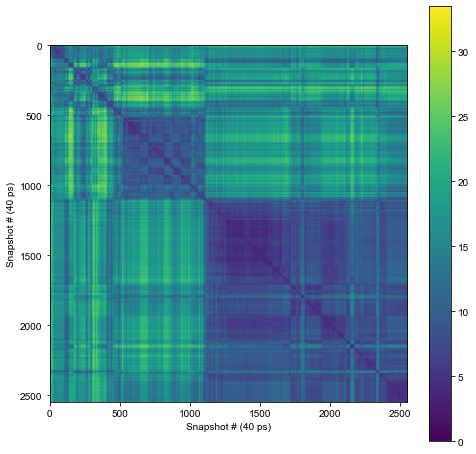

In [164]:
# Show the distance matrix
fig = plt.figure(figsize=(8,8))
im = plt.imshow(distances)
plt.xlabel('Snapshot # (%d ps)'%(stride*4))
plt.ylabel('Snapshot # (%d ps)'%(stride*4))
plt.colorbar()
plt.savefig('distance_matrix.png')

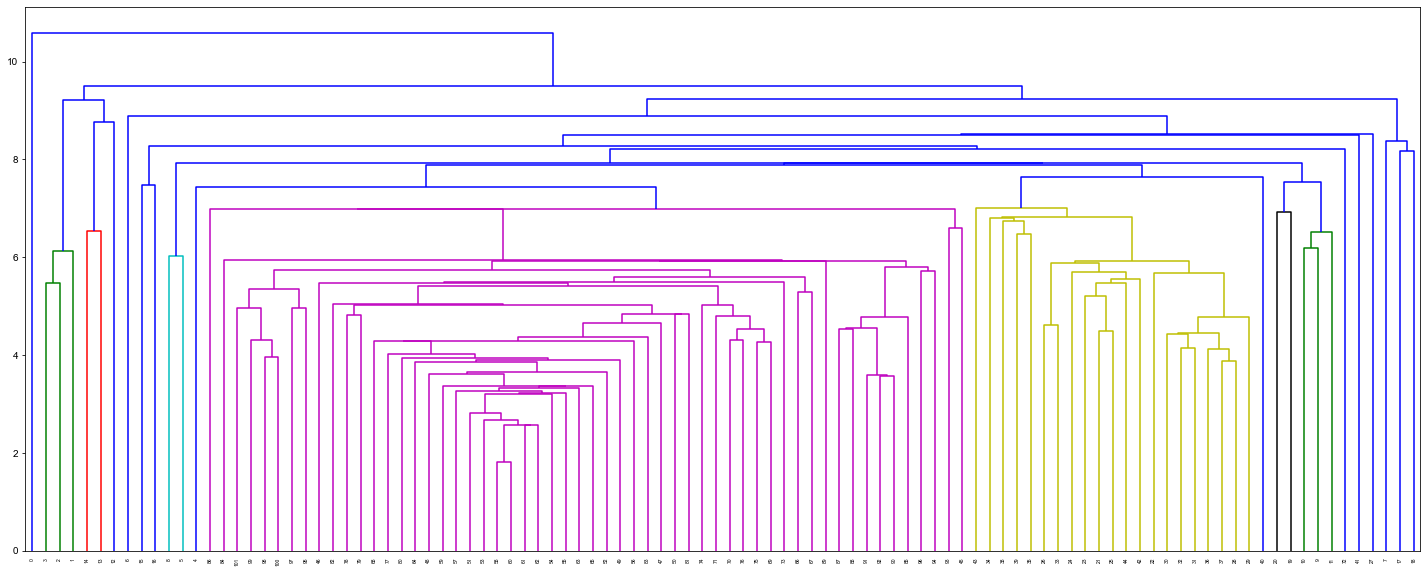

In [197]:
# Generate dendrogram based on every 1 ns of simulation
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

Z = linkage(squareform(np.array(distances)[::25,::25]), 'single', optimal_ordering=True)
fig = plt.figure(figsize=(25, 10))

dn = dendrogram(Z)
plt.savefig('dendrogram.png')

In [200]:
# Cluster every observation in the distance matrix (every 40 ps)
Z = linkage(squareform(distances), 'single', optimal_ordering=True)

In [206]:
fcluster = scipy.cluster.hierarchy.fcluster(Z, 20, criterion='maxclust')

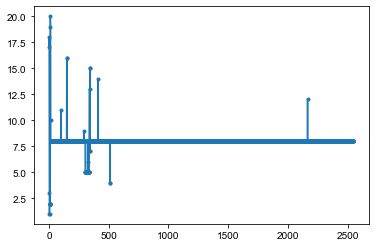

In [207]:
plt.plot(fcluster,'.-')